# Pandas

In [ ]:
import pandas as pd
import numpy as np

### Object creation

##### Series

In [ ]:
# case 1: use the dictionary to create an pandas object
dict_v = {'a':0, 'b':1, 'c':2, 'd':3}
sr = pd.Series(dict_v)    # sr - series - one-dimention dictionary
print(sr)

# case 2: use key-value objects
v = [0, 1, 2, 3]
k = ['a', 'b', 'c', 'd']
sr = pd.Series(v, index = k)
print(sr)

In [ ]:
# view the index attribute
print(sr.index)
# view the value attribute
print(sr.values)

in any way(table, array, tensor), the values will be an array
##### DataFrame
it has 3 attributes: values, index, columns

1st way

In [ ]:
# age
v1 = [53, 64, 72, 82]
i = ['No.1', 'No.2', 'No.3', 'No.4']
sr1 = pd.Series(v1, index = i)
sr1

In [ ]:
# sex
v2 = ['female', 'male', 'male', 'female']
i = ['No.1', 'No.2', 'No.3', 'No.4']
sr2 = pd.Series(v2, index = i)
sr2

In [ ]:
# create a dataframe object
df = pd.DataFrame({'age':sr1, 'sex':sr2})    # df-function will include all the index in sr1 and sr2, and the missing place will be 'NaN'
df

2nd way - most straightforward\
\
pass parameters to the pd.DataFrame(), which requires three parameters:\
1st: the values (array)\
attention: if the value-types diverge, it will choose the type with the best compatibility as the value-type\
2nd: the row labels index\
3rd: the column labels columns\
\
the index and columns parameters can be omitted, and after omission, they will be sequential numbers starting from 0

In [ ]:
# create values
v = np.array([[53, 'female'], [64, 'male'], [72, 'male'], [82, 'female']])
i = ['No.1', 'No.2', 'No.3', 'No.4']
c = ['age', 'sex']

In [ ]:
# create a dataframe
df = pd.DataFrame(v, index = i, columns = c)
df

the attributes of dataframe

In [ ]:
print(df.values)
print(df.index)
print(df.columns)

In [ ]:
# focus on the values
arr = df.values
print(arr)
arr = arr[:, 0]   		# get the first col
print(arr)        		# we can know that the elements are all strings
arr = arr.astype(int)   # change it into int-type
print(arr)

### Index
##### Series

it has 2 kinds of index: explicit(the index created by the user) and implicit(0, 1, 2, ...) and we shall use loc() and iloc() respectively

In [ ]:
v = [53, 64, 72, 82]
i = ['No.1', 'No.2', 'No.3', 'No.4']
sr = pd.Series(v, index = i)
print(sr)

In [ ]:
# explicit
print(sr['No.1'])
print(sr.loc['No.1'])
print(sr[['No.1', 'No.3']])       # create a fancy index
print(sr.loc[['No.1', 'No.3']])

# implicit
print(sr[0])
print(sr.iloc[0])
sr.iloc[0] = 10                   # change the number
sr

slice\
basically same with numpy, also a shallow copy

In [ ]:
v = [53, 64, 72, 82]
i = ['No.1', 'No.2', 'No.3', 'No.4']
sr = pd.Series(v, index = i)
print(sr)

In [ ]:
cut = sr.loc['No.1':'No.3']    # attention: this slice will include the boundary values('No.1' and 'No.3'), slight difference with the implicit
print(cut)

cut = sr.iloc[0:2]             # show the difference
print(cut)

cut = sr.loc['No.1':'No.3']
cut['No.1'] = 0          	   # a shallow copy
print(sr)

In [ ]:
# if we'd like to make a deep copy, just use .copy()
v = [53, 64, 72, 82]
i = ['No.1', 'No.2', 'No.3', 'No.4']
sr = pd.Series(v, index = i)

cut = sr.loc['No.1':'No.3'].copy()         # a deep copy
cut.loc['No.1'] = 0
print(sr)

##### DataFrame
it must include the indexer, or it will be wrong\
\
ATTENTION:\
in dataframe, if we'd like to visit the column, we shall use df['col'],\
else(index) we may use df.loc[ ] or df.iloc[ ]

In [ ]:
v = np.array([[53, 'female'], [64, 'male'], [72, 'male'], [82, 'female']])
i = ['No.1', 'No.2', 'No.3', 'No.4']
c = ['age', 'sex']
df = pd.DataFrame(v, index = i, columns = c)
df

In [ ]:
print(df.loc['No.1']['age'])                            # assess an element, can also be  " df.loc['No.1', 'age'] "
print(df.loc[['No.1', 'No.3'], ['age', 'sex']])         # make a slice (be aware of the ',' used)

### the change of the object
transposition

In [ ]:
v = np.array([[53, 64, 72, 82], ['female', 'male', 'male', 'female']])
i = ['age', 'sex']
c = ['No.1', 'No.2', 'No.3', 'No.4']
df = pd.DataFrame(v, index = i, columns = c)
print(df)
df = df.T
print(df)

flip

In [ ]:
df = df.iloc[::, ::-1]          # left-right
df

In [ ]:
df = df.iloc[::-1, ::]          # upside down
df

reshape

In [ ]:
i = ['No.1', 'No.2', 'No.3', 'No.4']

v1 = [10, 20, 30, 40]
v2 = ['female', 'male', 'male', 'female']
v3 = [1, 2, 3, 4]

sr1 = pd.Series(v1, index = i)
sr2 = pd.Series(v2, index = i)
sr3 = pd.Series(v3, index = i)

sr1, sr2, sr3

In [ ]:
df = pd.DataFrame({'score':sr1, 'sex':sr2})
df

In [ ]:
df['rank'] = sr3        # if you create a non-named column, the df will create a new column named this
print(df)
sr4 = df['score']       # if not, it will choose the column with the same name
print(sr4)

concatenate

In [ ]:
v1 = [10, 20, 30, 40]
v2 = [40, 50, 60]
k1 = ['No.1', 'No.2', 'No.3', 'No.4']
k2 = ['No.4', 'No.5', 'No.6']
sr1 = pd.Series(v1, index = k1)
sr2 = pd.Series(v2, index = k2)
print(sr1, sr2)

# concatenate
sr3 = pd.concat([sr1, sr2])

# judge the uniqueness of the index
print(sr3.index.is_unique)

In [ ]:
i = ['No.1', 'No.2', 'No.3', 'No.4']

v1 = [10, 20, 30, 40]
v2 = ['female', 'male', 'male', 'female']
v3 = [1, 2, 3, 4]

sr1 = pd.Series(v1, index = i)
sr2 = pd.Series(v2, index = i)
sr3 = pd.Series(v3, index = i)

df = pd.DataFrame({'score':sr1, 'sex':sr2})

df['rank'] = sr3        				# add a new column
print(df)

df.loc['No.5'] = [50, 'female', 5]		# add a new index
df

In [ ]:
v1 = [[10, 'f'], [20, 'm'], [30, 'm'], [40, 'f']]
v2 = [[1, 'yes'], [2, 'no'], [3, 'yes'], [4, 'no']]
v3 = [[50, 'm', 5, 'yes'], [60, 'm', 6, 'no']]

i1 = ['No.1', 'No.2', 'No.3', 'No.4']
i2 = ['No.1', 'No.2', 'No.3', 'No.4']
i3 = ['No.5', 'No.6']

c1 = ['age', 'sex']
c2 = ['rank', 'ikun']
c3 = ['age', 'sex', 'rank', 'ikun']

df1 = pd.DataFrame(v1, index = i1, columns = c1)
df2 = pd.DataFrame(v2, index = i2, columns = c2)
df3 = pd.DataFrame(v3, index = i3, columns = c3)

print(df1)
print(df2)
print(df3)

In [ ]:
df = pd.concat([df1, df2], axis = 1)
df

In [ ]:
df = pd.concat([df, df3], axis = 0)
df

### Calculation
the pandas is built on the numpy, so any function in numpy can be used in sr and df

In [ ]:
# create sr and df
sr = pd.Series([53, 76, 24], index = ['No.1', 'No.2', 'No.3'])
print(sr)

sr = sr + 10
print(sr)

sr = sr * 10
print(sr)

sr = sr ** 2
print(sr)

In [ ]:
v = [[53, 'f'], [64, 'm'], [72, 'm']]
df = pd.DataFrame(v, index = ['No.1', 'No.2', 'No.3'], columns = ['age', 'sex'])
print(df)

df['age'] = df['age'] + 10         # attention: although the df is an 'object' type, the df['age'] series is an 'int' type
print(df)

df['age'] = df['age'] * 10
print(df)

df['age'] = df['age'] ** 2
print(df)

In [ ]:
v1 = [1, 2, 3, 4]
v2 = [5, 6, 7]

k1 = ['No.1', 'No.2', 'No.3', 'No.4']
k2 = ['No.1', 'No.2', 'No.3']

sr1 = pd.Series(v1, index = k1)
sr2 = pd.Series(v2, index = k2)

sr = sr1 + sr2         # if one index is missing, it will be 'NaN', and the total series will be a 'float' type
print(sr)

sr = sr1 * sr2
print(sr)

sr = sr1 ** sr2
print(sr)

In [ ]:
v1 = [[10, 'f'], [20, 'm'], [30, 'm'], [40, 'f']]
v2 = [1, 2, 3, 6]
i1 = ['No.1', 'No.2', 'No.3', 'No.4'];	c1 = ['age', 'sex']
i2 = ['No.1', 'No.2', 'No.3', 'No.6']; c2 = ['number']
df1 = pd.DataFrame(v1, index = i1, columns = c1)
df2 = pd.DataFrame(v2, index = i2, columns = c2)

df1['add'] = df1['age'] + df2['number']    # if the index doesn't match, the result will be 'NaN', and it will only have the former one's index
df1

### Null value
##### find the null value

In [ ]:
v = [53, None, 72, 82]
k = ['No.1', 'No.2', 'No.3', 'No.4']
sr = pd.Series(v, index = k)
print(sr)

# find the null value
sr.isnull()       # null - True

In [ ]:
v = [[None, 1], [64, None], [72, 3], [89, 4]]
i = ['No.1', 'No.2', 'No.3', 'No.4']
c = ['age', 'number']
df = pd.DataFrame(v, index = i, columns = c)
print(df)

# find the null value
df.isnull()      # the opposite one will be ~df.isnull()

##### delete the null value

In [ ]:
v = [53, None, 72, 82]
k = ['No.1', 'No.2', 'No.3', 'No.4']
sr = pd.Series(v, index = k)
print(sr)

# delete the null value
sr.dropna()

In [ ]:
v = [[None, 1], [None, None], [72, 3], [89, 4]]
i = ['No.1', 'No.2', 'No.3', 'No.4']
c = ['age', 'number']
df = pd.DataFrame(v, index = i, columns = c)
print(df)

# delete the index with null value
print(df.dropna())     # there is an 'axis' parament, default = 0(delete index); if axis = 1, it will delete columns

# moreover, if we'd like to delete the index in which all the paraments are null, we shall use df.dropna(how = 'all')
print(df.dropna(how = 'all'))

# if we want to delete the index which have at least x values that isn't null, we shall use df.dropna(thresh = x)
print(df.dropna(thresh = 1))
print(df.dropna(thresh = 2))

##### fill in the null value
.fillna()

In [ ]:
v = [53, None, 72, 82]
k = ['No.1', 'No.2', 'No.3', 'No.4']
sr = pd.Series(v, index = k)
print(sr)

print(sr.fillna(0))              		 # use 0 to fill in the null value, 0 can be changed into any number
print(sr.fillna(np.mean(sr)))

print(sr.fillna(method = 'ffill'))		 # fill in with the former number, attention: if the former values are all null, it will still be NaN
print(sr.fillna(method = 'bfill'))       # fill in with the latter number

In [ ]:
v = [[None, 1], [None, None], [72, 3], [89, 4]]
i = ['No.1', 'No.2', 'No.3', 'No.4']
c = ['age', 'number']
df = pd.DataFrame(v, index = i, columns = c)
print(df)

print(df.fillna(0))

print(df.fillna(np.mean(df)))

print(df.fillna(method = 'ffill'))
print(df.fillna(method = 'bfill'))

### import information from excel
attention: the first column and the first index shouldn't be the values, if it is, add a column or index with a range\
\
step 1: save the excel documentary in .csv form under the same folder
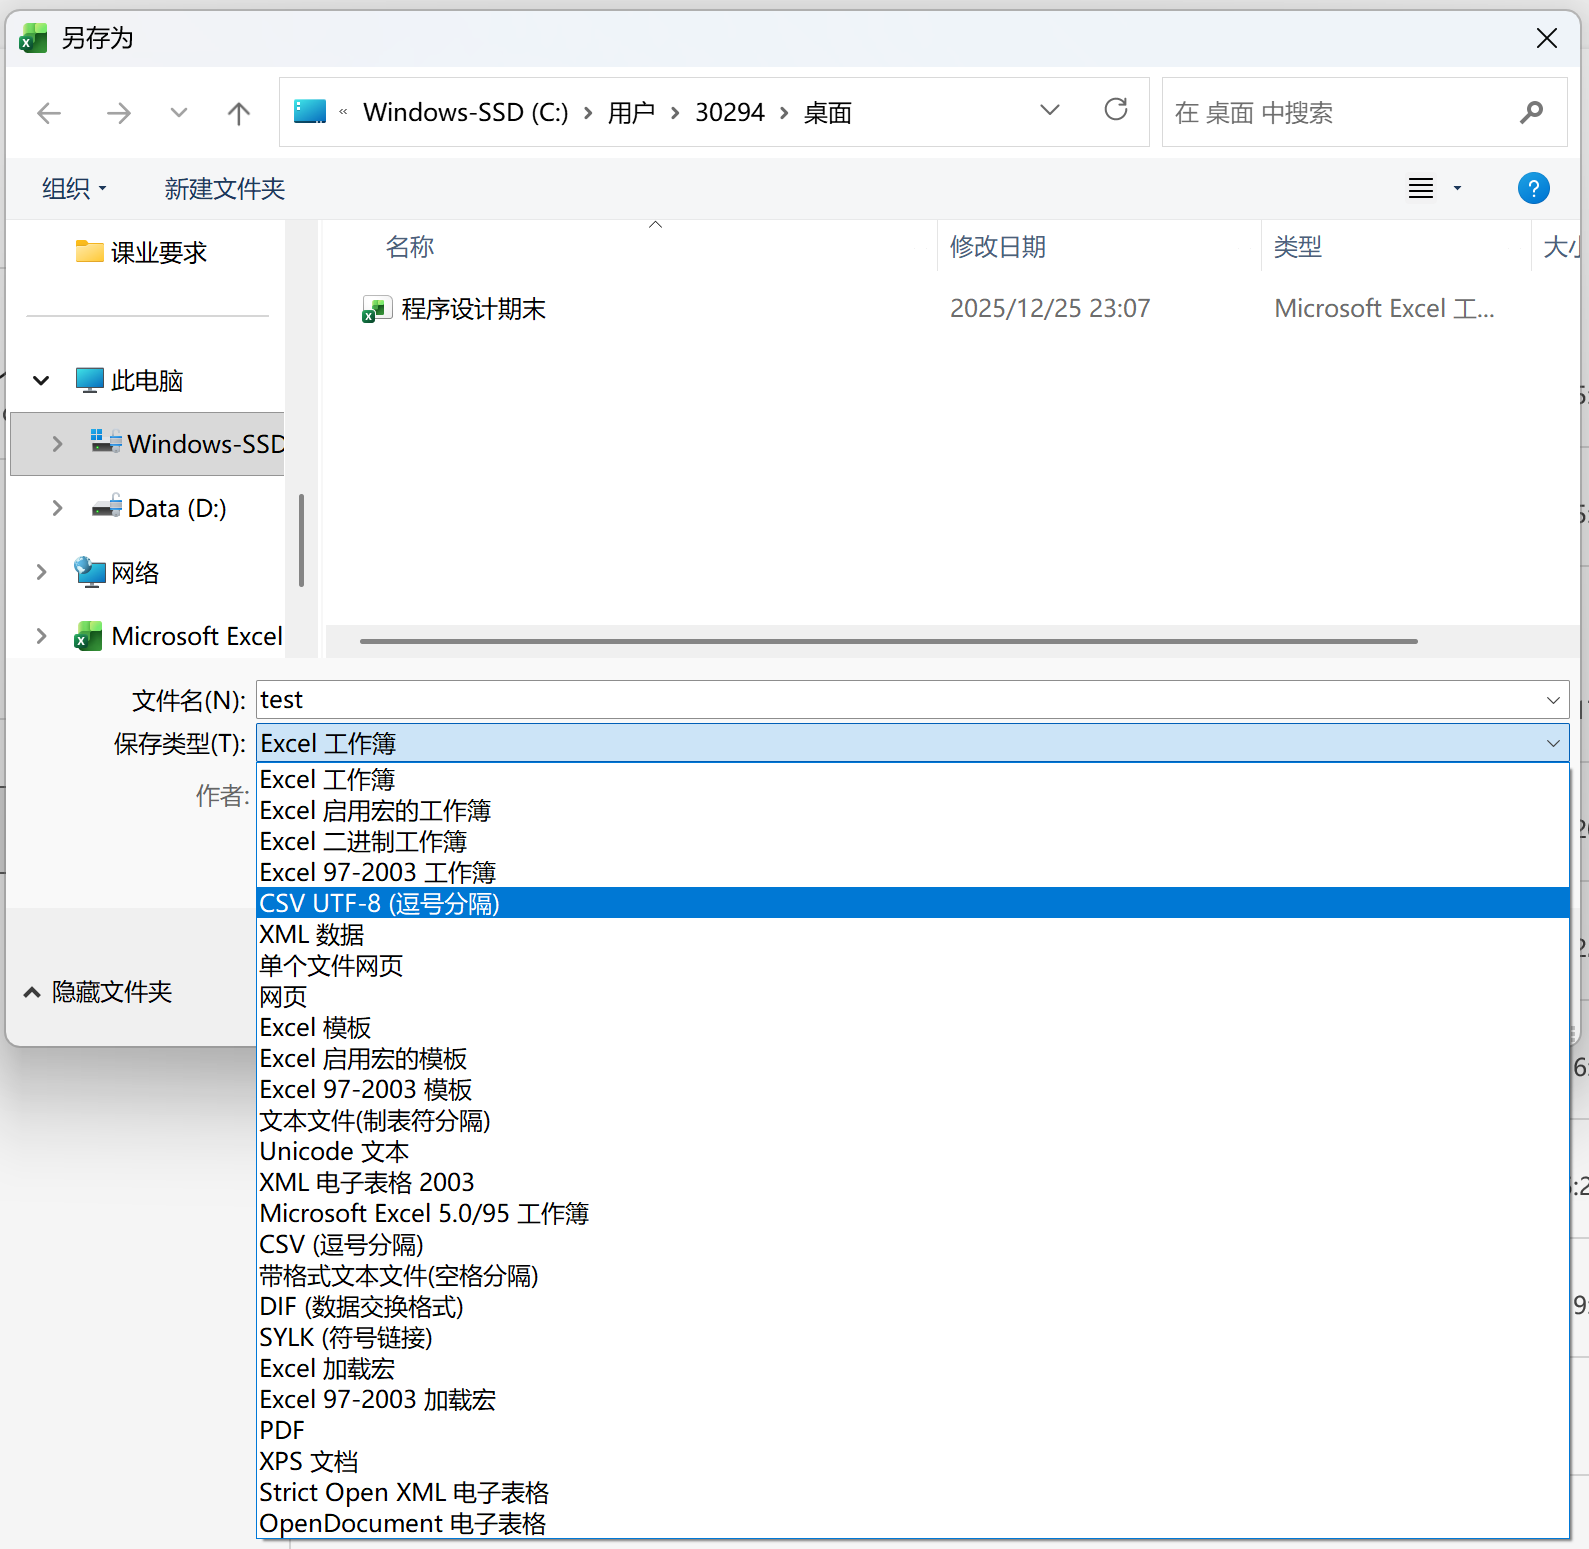
step 2: use .read_csv() to import the information

In [ ]:
df = pd.read_csv('test.csv', index_col = 0)    # index_col = 0 is used to set it(col 0) as the index column
df

In [ ]:
# we can also get the array
arr = df.values
arr

### Data Analysis

In [ ]:
df = pd.read_csv('行星数据.csv', index_col = 0)
df

In [ ]:
# we can use .head() to make it only output the first 5 value lines
df.head()

the functions in numpy can mostly be used in pandas, and the functions will automatically ignore the null numbers\
\
attention: in some functions, only numeric columns can be calculated, so we shall disparate the numeric ones first

In [ ]:

numeric_cols = df.select_dtypes(include=['number']).columns

print(df.max())
print(df.min())
print(df[numeric_cols].mean())
print(df[numeric_cols].std())
print(df[numeric_cols].sum())

a easy way to know some details about the data ---- .describe()

In [ ]:
df.describe()

pivot -- a way to figure out if some elements have any relation\
\
the .pivot_table() function is a visible .mean() function

In [ ]:
df = pd.read_csv('泰坦尼克.csv', index_col = 0)
df

In [ ]:
df.pivot_table('是否生还', index = '性别')

In [ ]:
df.pivot_table('是否生还', index = '性别', columns = '船舱等级')

but if we want to add the age into consideration, it could be a hard work to do so since it has too many index, so we need to sort the values with .cut() or .qcut()

In [ ]:
age = pd.cut(df['年龄'], [0, 25, 120])
age

In [ ]:
fare = pd.qcut(df['费用'], 2)     # automatically divide it into 2 parts
fare

In [ ]:
df.pivot_table('是否生还', index = ['性别', age], columns = '船舱等级')

In [ ]:
df.pivot_table('是否生还', index = ['性别', age], columns = ['船舱等级', fare])